In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
y_pred=np.array([0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
                 3, 2, 8, 4, 4, 4, 4, 4, 4, 5, 5, 5, 0, 0, 5, 5, 5, 6, 6, 3, 7, 7,
                 7, 7, 4, 2, 5, 5, 3, 3, 5, 8, 7, 3, 7, 7, 7, 7])
y_test=np.array([])
for i in range(0,10):
    y_test=np.hstack([y_test, np.zeros(6)+i])

In [3]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

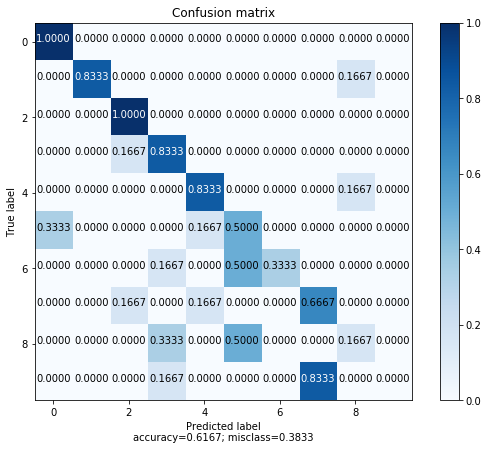

In [4]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)